In [38]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

import os,sys
import numpy as np
import pandas as pd
import seaborn as sb
from seaborn import pairplot

from keras.models import Sequential # Class
from keras.models import load_model # model 사용
from keras.layers import Dense # Class
from keras.layers import Dropout # Dropout 처리
from keras.callbacks import EarlyStopping  # 학습 자동 중지
from keras.callbacks import ModelCheckpoint # 우수한 학습모델 저장
from keras import regularizers
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline


In [39]:
df = pd.read_csv('./iris_0.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
#df_val = pd.read_csv('./iris_val.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print('1) df.head()')
print(df.head())

1) df.head()
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


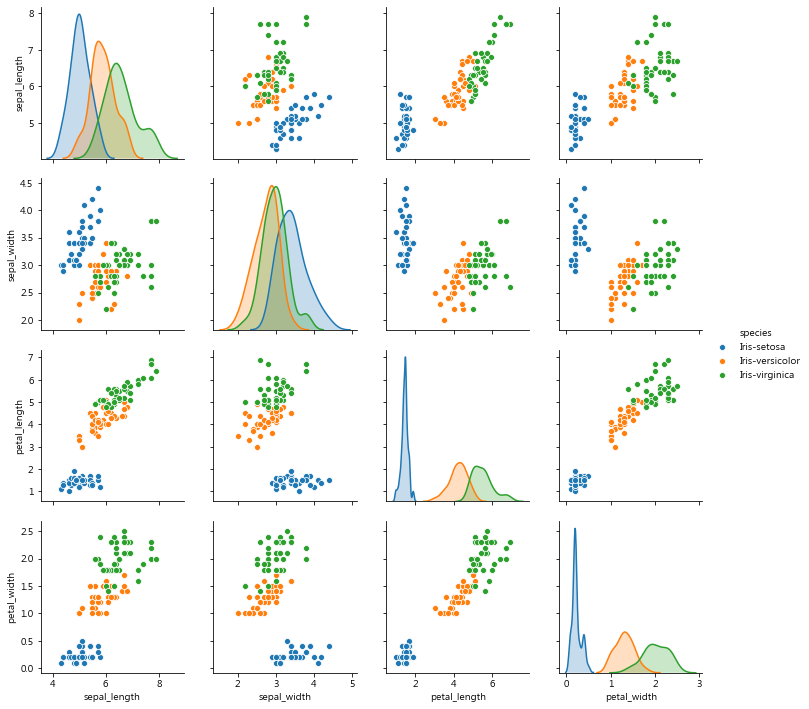

In [40]:
sb.pairplot(df, hue='species')
plt.show()

In [41]:
data = df.values
print(type(data))
X = data[:, 0:4].astype(float)  # 행렬, 2차원 배열
print(X[0:5, 0:4])
Y_obj = data[:, 4]  # 1차원 배열
print(Y_obj[0:5])

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [42]:
e = LabelEncoder() # 문자열을 숫자로 그룹화해서 변경, 문자코드 순서 적용
e.fit(Y_obj)   # 품종 3가지
Y = e.transform(Y_obj)  # 0, 1, 2 정수로 변환 (알파벳 순으로 숫자부여)
print(Y)
print(len(Y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
120


In [45]:
# 품종이 3가지인경우 그 품종에 속할 확률도 3가지가 출력됨.
# 품종이 10만가지이면 그 품종에 속할 확률도 10만가지가 출력됨.
# 머신러닝에서는 종류의 갯수만큼 출력 갯수가 선언되어야함.
# LabelEncoder에 의해서 vector화된 값
# Iris-setosa       0
# Iris-versicolor   1
# Iris-virginica    2

Y_encoded = to_categorical(Y) # one-hot-encoding
print(Y_encoded.shape)


(120, 3)


In [48]:
print(X[0])             # Iris-setosa  0  [5.1 3.5 1.4 0.2]
print(Y_encoded[0]) # 폼좀의 갯수가 3개임으로 [1. 0. 0.], 10만개이면 1또는 0이 10만개가됨 
 
print(X[50])             # Iris-versicolor  1  [5.9 3.2 4.8 1.8]
print(Y[50])
print(Y_encoded[50]) # [0. 1. 0.]

print(X[100])            # Iris-virginica  2  [7.4 2.8 6.1 1.9]
print(Y[100])
print(Y_encoded[100]) # [0. 0. 1.]

[5.1 3.5 1.4 0.2]
[1. 0. 0.]
[5.9 3.2 4.8 1.8]
1
[0. 1. 0.]
[7.4 2.8 6.1 1.9]
2
[0. 0. 1.]


In [51]:
# 두개의 은닉층을 사용하는 경우
model = Sequential()
# 입력값 8, 출력 노드 128개, 활성화 함수 : linear
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax')) # 품종 3가지 다변량 분석
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)

hist = model.fit(X, Y_encoded, validation_split = 0.1, shuffle=True, epochs=200, batch_size=10, callbacks=[early_stopping])

Train on 108 samples, validate on 12 samples
Epoch 1/200
108/108 [==============================] - 0s 3ms/step - loss: 1.7078 - acc: 0.3704 - val_loss: 2.4524 - val_acc: 0.0000e+00
Epoch 2/200
108/108 [==============================] - 0s 130us/step - loss: 1.0332 - acc: 0.4167 - val_loss: 0.9208 - val_acc: 0.5000
Epoch 3/200
108/108 [==============================] - 0s 130us/step - loss: 0.8647 - acc: 0.7870 - val_loss: 0.5150 - val_acc: 1.0000
Epoch 4/200
108/108 [==============================] - 0s 167us/step - loss: 0.8029 - acc: 0.7315 - val_loss: 0.6449 - val_acc: 1.0000
Epoch 5/200
108/108 [==============================] - 0s 148us/step - loss: 0.7170 - acc: 0.8241 - val_loss: 0.7662 - val_acc: 0.6667
Epoch 6/200
108/108 [==============================] - 0s 157us/step - loss: 0.6594 - acc: 0.8148 - val_loss: 0.6938 - val_acc: 0.8333
Epoch 7/200
108/108 [==============================] - 0s 157us/step - loss: 0.6070 - acc: 0.8796 - val_loss: 0.5352 - val_acc: 1.0000
Epoch 8/

Epoch 61/200
108/108 [==============================] - 0s 139us/step - loss: 0.1877 - acc: 0.9630 - val_loss: 0.2230 - val_acc: 1.0000
Epoch 62/200
108/108 [==============================] - 0s 120us/step - loss: 0.1813 - acc: 0.9537 - val_loss: 0.2829 - val_acc: 1.0000
Epoch 63/200
108/108 [==============================] - 0s 185us/step - loss: 0.1815 - acc: 0.9630 - val_loss: 0.2474 - val_acc: 1.0000
Epoch 64/200
108/108 [==============================] - 0s 148us/step - loss: 0.1796 - acc: 0.9722 - val_loss: 0.1985 - val_acc: 1.0000
Epoch 65/200
108/108 [==============================] - 0s 120us/step - loss: 0.1848 - acc: 0.9537 - val_loss: 0.3168 - val_acc: 1.0000
Epoch 66/200
108/108 [==============================] - 0s 167us/step - loss: 0.1786 - acc: 0.9815 - val_loss: 0.1585 - val_acc: 1.0000
Epoch 67/200
108/108 [==============================] - 0s 157us/step - loss: 0.1758 - acc: 0.9722 - val_loss: 0.2841 - val_acc: 1.0000
Epoch 68/200
108/108 [==========================

108/108 [==============================] - 0s 139us/step - loss: 0.1164 - acc: 0.9815 - val_loss: 0.1098 - val_acc: 1.0000
Epoch 122/200
108/108 [==============================] - 0s 120us/step - loss: 0.1146 - acc: 0.9630 - val_loss: 0.1581 - val_acc: 1.0000
Epoch 123/200
108/108 [==============================] - 0s 148us/step - loss: 0.1135 - acc: 0.9630 - val_loss: 0.1365 - val_acc: 1.0000
Epoch 124/200
108/108 [==============================] - 0s 130us/step - loss: 0.1112 - acc: 0.9815 - val_loss: 0.1136 - val_acc: 1.0000
Epoch 125/200
108/108 [==============================] - 0s 148us/step - loss: 0.1115 - acc: 0.9722 - val_loss: 0.1346 - val_acc: 1.0000
Epoch 126/200
108/108 [==============================] - 0s 148us/step - loss: 0.1131 - acc: 0.9722 - val_loss: 0.1166 - val_acc: 1.0000
Epoch 127/200
108/108 [==============================] - 0s 157us/step - loss: 0.1151 - acc: 0.9722 - val_loss: 0.1644 - val_acc: 1.0000
Epoch 128/200
108/108 [==============================] 

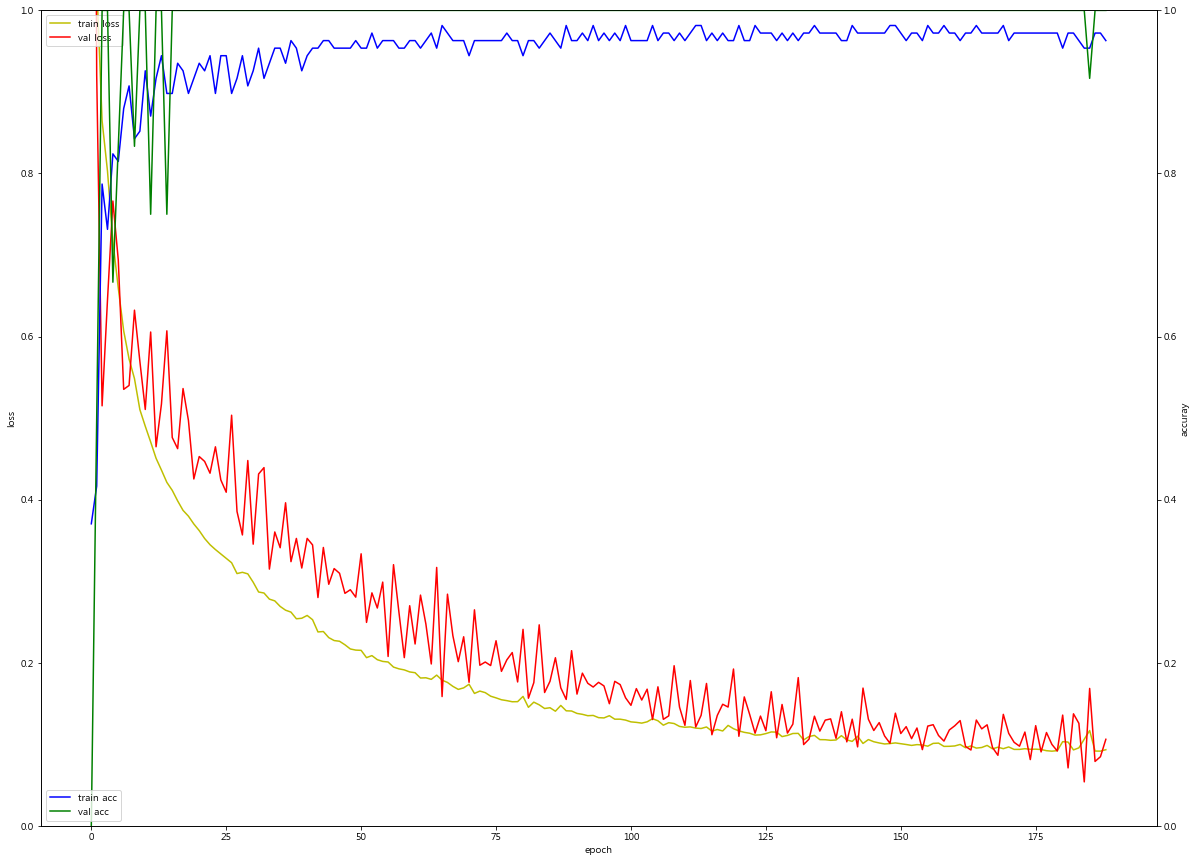

In [52]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
#fig.set_size_inches(10, 5)  # 챠트 크기 설정
fig.set_size_inches(20, 15)  # 챠트 크기 설정 가로*세로

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 검증 오차
#loss_ax.set_xlim([0.0, 100.0]) # 값을 반영하여 변경
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')  # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')  # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y축

loss_ax.set_xlabel('epoch')  #  x축 레이블
loss_ax.set_ylabel('loss')  #   y축 오차 레이블
acc_ax.set_ylabel('accuray') #   y축 정확도 레이블

loss_ax.legend(loc='upper left')  # 오차레이블 출력 위치
acc_ax.legend(loc='lower left')   # 정확도 레이블 출력 위치

plt.show()

In [55]:
df_test = pd.read_csv('./iris_test_1.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(df_test.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.0          3.5           1.3          0.3  Iris-setosa
1           4.5          2.3           1.3          0.3  Iris-setosa
2           4.4          3.2           1.3          0.2  Iris-setosa
3           5.0          3.5           1.6          0.6  Iris-setosa
4           5.1          3.8           1.9          0.4  Iris-setosa


In [59]:
data_test = df_test.values
print(type(data_test))

X_test = data_test[:, 0:4].astype(float)  # 행렬, 2차원 배열
print(X_test[0:5, 0:4])
print(X_test.shape)

Y_obj_test = data_test[:, 4]  # 1차원 배열
print(Y_obj[0:5])
print(Y_obj.shape)

<class 'numpy.ndarray'>
[[5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]]
(30, 4)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
(30,)


In [62]:
e = LabelEncoder() # 문자열을 숫자로 그룹화해서 변경, 문자코드 순서 적용
e.fit(Y_obj_test)   # R, M 
Y_test = e.transform(Y_obj_test)  # 0, 1, 2 정수로 변환 (알파벳 순으로 숫자부여)
print(Y_test)
print(len(Y_test))
Y_encoded_test = to_categorical(Y_test)  # one - hot-encoding

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
30


In [64]:
test_loss, test_acc = model.evaluate(X_test,Y_encoded_test, batch_size=2)
print('손실값 : ', test_loss, ' / 정확도 : ', (test_acc*100), '%')

30/30 [==============================] - 0s 1ms/step
손실값 :  0.023237965574177604  / 정확도 :  100.0 %


In [65]:
model.save('./Iris1.h5')

In [66]:
model = load_model('./Iris1.h5')

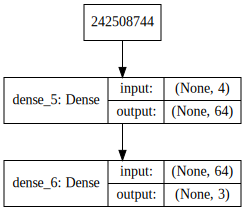

In [67]:
# plot graph 이미지 생성
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
plot_model(model, to_file='cnn_ahspe_graph.png')

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________
